<a href="https://colab.research.google.com/github/Tejashree56/AIML/blob/main/CIE3_Practise1(play)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded=files.upload()

Saving Play.csv to Play (1).csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import r2_score

In [8]:
df=pd.read_csv('Play.csv')
df

,outlook,temperature,humidity,wind,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rainy,mild,high,weak,yes
4,rainy,cool,normal,weak,yes
5,rainy,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rainy,mild,normal,weak,yes


In [9]:
df.describe

<bound method NDFrame.describe of      outlook temperature humidity    wind play
0      sunny         hot     high    weak   no
1      sunny         hot     high  strong   no
2   overcast         hot     high    weak  yes
3      rainy        mild     high    weak  yes
4      rainy        cool   normal    weak  yes
5      rainy        cool   normal  strong   no
6   overcast        cool   normal  strong  yes
7      sunny        mild     high    weak   no
8      sunny        cool   normal    weak  yes
9      rainy        mild   normal    weak  yes
10     sunny        mild   normal  strong  yes
11  overcast        mild     high  strong  yes
12  overcast         hot   normal    weak  yes
13     rainy        mild     high  strong   no>

In [10]:
df.info

<bound method DataFrame.info of      outlook temperature humidity    wind play
0      sunny         hot     high    weak   no
1      sunny         hot     high  strong   no
2   overcast         hot     high    weak  yes
3      rainy        mild     high    weak  yes
4      rainy        cool   normal    weak  yes
5      rainy        cool   normal  strong   no
6   overcast        cool   normal  strong  yes
7      sunny        mild     high    weak   no
8      sunny        cool   normal    weak  yes
9      rainy        mild   normal    weak  yes
10     sunny        mild   normal  strong  yes
11  overcast        mild     high  strong  yes
12  overcast         hot   normal    weak  yes
13     rainy        mild     high  strong   no>

In [11]:
df.isnull().sum()

outlook        0
temperature    0
humidity       0
wind           0
play           0
dtype: int64

In [12]:
df.shape

(14, 5)

In [14]:
df.columns

Index(['outlook', 'temperature', 'humidity', 'wind', 'play'], dtype='object')

In [16]:
df['outlook'].value_counts()

sunny       5
rainy       5
overcast    4
Name: outlook, dtype: int64

In [17]:
df['temperature'].value_counts()

mild    6
hot     4
cool    4
Name: temperature, dtype: int64

In [18]:
df['humidity'].value_counts()

high      7
normal    7
Name: humidity, dtype: int64

In [19]:
df['wind'].value_counts()

weak      8
strong    6
Name: wind, dtype: int64

In [20]:
df['play'].value_counts()

yes    9
no     5
Name: play, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [26]:
df['outlook']=le.fit_transform(df['outlook'])
df['temperature']=le.fit_transform(df['temperature'])
df['humidity']=le.fit_transform(df['humidity'])
df['wind']=le.fit_transform(df['wind'])
df['play']=le.fit_transform(df['play'])
df

,outlook,temperature,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


If it is Float datatype convert it into int typ eby the following way given below:

In [ ]:
df['outlook'] = df['outlook'].astype('int')
df['temperature'] = df['temperature'].astype('int')
df['humidity'] = df['humidity'].astype('int')
df['wind'] = df['wind'].astype('int')
df['play'] = df['play'].astype('int')

<Axes: >

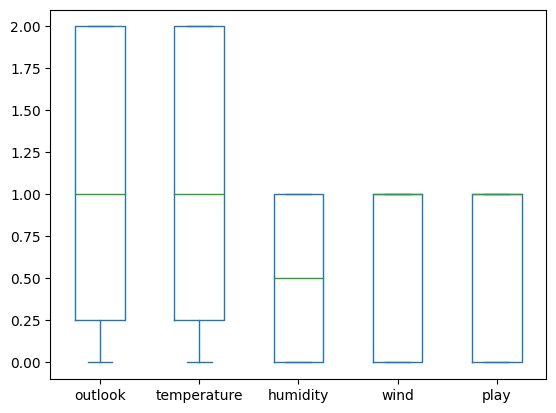

In [27]:
df.plot(kind='box')

From here linear regression method is used:

In [28]:
x=df.iloc[:,0:4].values
y=df.iloc[:,4].values.reshape(-1,1)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
print("The Shape of the x_train:",x_train.shape)
print("The Shape of the X_test:",x_test.shape)
print("The Shape of the y_train:",y_train.shape)
print("The Shape of the y_test:",y_test.shape)

The Shape of the x_train: (11, 4)
The Shape of the X_test: (3, 4)
The Shape of the y_train: (11, 1)
The Shape of the y_test: (3, 1)


In [35]:
reg=LinearRegression()

In [38]:
reg.fit(x_train,y_train)
print("Training Complete")

Training Complete


In [39]:
c=reg.coef_
m=reg.intercept_
print("The Coefficient is:",c)
print("The intercept is:",m)

The Coefficient is: [[-0.3619469   0.3699115   0.40176991  0.1840708 ]]
The intercept is: [0.15575221]


In [40]:
x_test

array([[2, 0, 1, 1],
       [0, 0, 1, 0],
       [1, 0, 1, 1]])

In [41]:
y_test

array([[1],
       [1],
       [1]])

In [42]:
y_pred=reg.predict(x_test)
print(y_pred)

[[0.01769912]
 [0.55752212]
 [0.37964602]]


In [43]:
y_test=y_test.ravel()
y_pred=y_pred.ravel()

In [44]:
actual_pred=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
print(actual_pred)

   Actual   Predict
0       1  0.017699
1       1  0.557522
2       1  0.379646


In [45]:
print("Training Score:",reg.score(x_train,y_train))
print("Testing Score:",reg.score(x_test,y_test))

Training Score: 0.6800589970501475
Testing Score: 0.0


<Axes: >

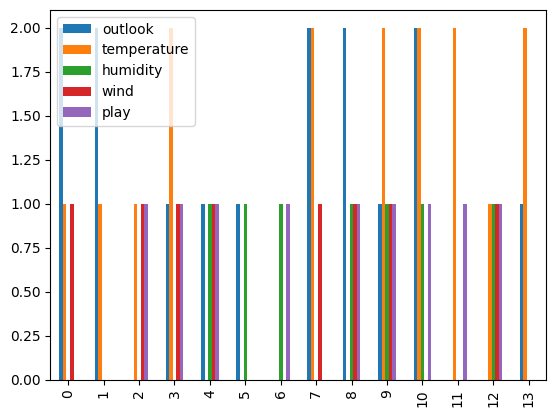

In [46]:
df.plot(kind='bar')

In [47]:
print("Accuracy:",reg.score(x,y)*100)

Accuracy: 24.770000261048995


In [48]:
df.columns

Index(['outlook', 'temperature', 'humidity', 'wind', 'play'], dtype='object')

In [49]:
df

,outlook,temperature,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [55]:
outlook=1
temperature=2
humidity=0
wind=1

In [56]:
p=reg.predict([[outlook,temperature,humidity,wind]])

In [57]:
print(f"I the match has following conditions:{outlook,temperature,humidity,wind}")

I the match has following conditions:(1, 2, 0, 1)


In [58]:
print("Mean Absolute error: ",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))

Mean Absolute error:  0.6817109144542767
R2 score:  0.0
